In [1]:
using Plots, FixedSizeArrays
pyplot(grid=false, size=(600,300))

typealias P2 FixedSizeArrays.Vec{2,Float64}
interpolate(a::P2, b::P2, pct::Real) = a + pct * (b - a)

INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


interpolate (generic function with 1 method)

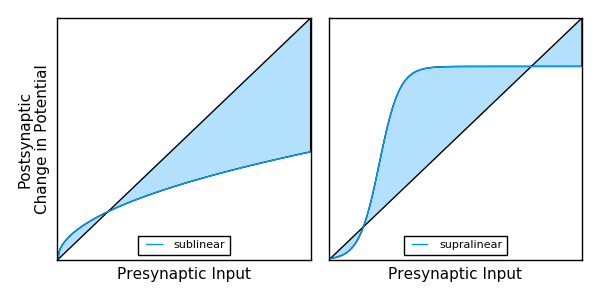

In [7]:
# the functions
linear(x) = x
sigmoid(x) = 1/(1+exp(-x))
sublinear(x) = sqrt(x)
supralinear(x) = 4sigmoid(5x-5)
funcs = [sublinear, supralinear]

# plot the functions from 0-->5, and fill to the diagonal
subplot(funcs, 0, 5, lab=map(string,funcs)', n=2,
fill=(0.3, linear), link=true, ytick=nothing, xtick=nothing,
    legend=:bottom,
    xlab="Presynaptic Input",
    ylab="Postsynaptic\nChange in Potential")
png("integration_shapes")
current()

In [1]:
abstract NeuralComponent

type Synapse <: NeuralComponent
    presynaptic_neuron
    presynaptic_current
end

type Segment <: NeuralComponent
    synapses
end

type Branch <: NeuralComponent
    segments
    fork
end    

type Soma
    inputs::Set{NeuralComponent}
    membrane_potential::Float64
end

In [ ]:
soma_in = P2[(-1,yi) for yi in linspace(-1,1,5)]
soma_out = P2(1,0);

In [ ]:
# set up the plot... first draw the axon/dendrite connections
p = plot(vcat([[s, soma_out, P2(NaN)] for s in soma_in]...), lab="",
        title="Dendrites as Cables",
        xlim=(-1.5,1.5), ylim=(-1.5,1.5),
        xtick=nothing, ytick=nothing)

# neuron bodies (soma)
scatter!(soma_in, m=(13), lab="  Input Neurons")
scatter!(soma_out, m=(20), lab="  Output Neuron")

# red dots representing the spikes
scatter!(soma_in, m=(5,:red), lab="")

# create an animation
anim = @animate for pct in linspace(0,1,40)
    p[4] = [interpolate(s, soma_out, pct) for s in soma_in] |> Plots.unzip
end
gif(anim, "simple_integration.gif", fps=20)